In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 


In [79]:

#dtypes = {'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'}
aviation_df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', dtype={'column_name_6': 'int64', 'column_name_7': 'float64', 'column_name_28': 'float64'})
aviation_df.info()

/Users/kariprimiano/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [80]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [81]:
#Formatting data

# Potentially format column headers

aviation_df["Incident.Date"] = pd.to_datetime(aviation_df["Event.Date"])
aviation_df["Incident.Date"].describe()

<ipython-input-81-bf06c9160983>:6: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  aviation_df["Incident.Date"].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Incident.Date, dtype: object

In [82]:
aviation_df["Make"] = aviation_df["Make"].str.lower()

In [83]:
aviation_df.columns = aviation_df.columns.str.lower().str.replace('.', '_')

In [84]:
# Drop unnecessary columns
aviation_df.drop(columns = ["location", "registration_number", "accident_number", "latitude", "longitude", "airport_code", "airport_name", "far_description", "schedule", "air_carrier", "report_status", "publication_date"], inplace=True)


In [85]:
#create column with the year of each event
aviation_df['event_year'] = [int(year[:4]) for year in aviation_df['event_date']]
aviation_df.head()

,event_id,investigation_type,event_date,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,...,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,incident_date,event_year
0,20001218X45444,Accident,1948-10-24,United States,Fatal(2),Destroyed,NaN,stinson,108-3,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,1948-10-24,1948
1,20001218X45447,Accident,1962-07-19,United States,Fatal(4),Destroyed,NaN,piper,PA24-180,No,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,1962-07-19,1962
2,20061025X01555,Accident,1974-08-30,United States,Fatal(3),Destroyed,NaN,cessna,172M,No,...,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,1974-08-30,1974
3,20001218X45448,Accident,1977-06-19,United States,Fatal(2),Destroyed,NaN,rockwell,112,No,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,1977-06-19,1977
4,20041105X01764,Accident,1979-08-02,United States,Fatal(1),Destroyed,NaN,cessna,501,No,...,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,1979-08-02,1979


In [86]:
aviation_df["purpose_of_flight"].value_counts()

Personal                     49448
Instructional                10601
Unknown                       6802
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: purpose_of_flight, dtype: int64

In [87]:

#purpose_of_flight_filtered = ["Personal", "Business", "Executive/corporate", "Public Aircraft", "Other Work Use", "Unknown", ]
# df['Relevant.Year'] = np.where(df['Event.Year'] >= y, True, False)

In [88]:
# Filter dates, amateur built, and purpose of flight

# Create new df of filtered data

selected_purposes = ["Personal", "Business", "Executive/corporate", "Public Aircraft", "Other Work Use", "Unknown"]

filtered_df = aviation_df[(aviation_df["event_year"] >= 1992) & 
                          (aviation_df["purpose_of_flight"].isin(selected_purposes)) & 
                          (aviation_df["amateur_built"] == "No") & 
                          ((aviation_df['make'].str.contains('airbus')) | 
                           (aviation_df['make'].str.contains('boeing')) | 
                           (aviation_df['make'].str.contains('cessna')) | 
                           (aviation_df['make'].str.contains('mitsubishi')) | 
                           (aviation_df['make'].str.contains('piper')) | 
                           (aviation_df['make'].str.contains('beechcraft')) | 
                           (aviation_df['make'].str.contains('"bombardier"')) | 
                           (aviation_df['make'].str.contains('embraer')) | 
                           (aviation_df['make'].str.contains('diamond')) | 
                           (aviation_df['make'].str.contains('gulfstream')))]
filtered_df.info()
filtered_df["make"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 29671 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_id                19053 non-null  object        
 1   investigation_type      19053 non-null  object        
 2   event_date              19053 non-null  object        
 3   country                 19037 non-null  object        
 4   injury_severity         19026 non-null  object        
 5   aircraft_damage         18742 non-null  object        
 6   aircraft_category       7703 non-null   object        
 7   make                    19053 non-null  object        
 8   model                   19049 non-null  object        
 9   amateur_built           19053 non-null  object        
 10  number_of_engines       18313 non-null  float64       
 11  engine_type             18067 non-null  object        
 12  purpose_of_flight       19053 non-null  ob

cessna                            11144
piper                              6855
boeing                              583
mitsubishi                           55
airbus industrie                     43
boeing stearman                      43
embraer                              41
diamond aircraft ind inc             29
diamond aircraft industries          24
gulfstream aerospace                 21
beechcraft                           20
piper aircraft inc                   18
gulfstream american                  18
gulfstream                           18
diamond                              15
cessna aircraft co                   14
hawker beechcraft corp               11
hawker beechcraft                     9
piper/cub crafters                    7
gulfstream american corp              7
airbus helicopters                    5
cessna aircraft                       5
airbus                                5
new piper aircraft inc                5
diamond aircraft                      4


In [89]:
top_companies = ["boeing", "airbus", "bombardier", "embraer", "cessna", "piper", 
             "diamond", "mitsubishi", "beechcraft", "gulfstream"]

counts = {}
for company in company_list_strings:
    if company in top_companies:
        if company in counts:
            counts[company] +=1
        else:
            counts[company] = 1
            
            
counts

{'airbus': 56,
 'beechcraft': 2716,
 'boeing': 633,
 'bombardier': 13,
 'cessna': 11173,
 'diamond': 76,
 'embraer': 44,
 'gulfstream': 69,
 'mitsubishi': 55,
 'piper': 6899}

In [92]:
top_companies = ["boeing", "airbus", "bombardier", "embraer", "cessna", "piper", 
             "diamond", "mitsubishi", "beechcraft", "gulfstream"]

for company in top_companies:
    mask = filtered_df['make'].str.contains(company, case=False, na=False)
    filtered_df.loc[mask, 'make'] = company

print(filtered_df["make"].value_counts().sort_index()[:50])

airbus           56
beechcraft       48
boeing          633
cessna        11173
diamond          76
embraer          44
gulfstream       69
mitsubishi       55
piper          6899
Name: make, dtype: int64


In [95]:
((filtered_df['total_fatal_injuries'].isna()) 
 & (filtered_df['total_serious_injuries'].isna()) 
 & (filtered_df['total_minor_injuries'].isna()) 
 & (filtered_df['total_uninjured'].isna())).sum()

22

In [97]:
filtered_df['injuries_reported'] = ((filtered_df['total_fatal_injuries'].notna()) 
 | (filtered_df['total_serious_injuries'].notna()) 
 | (filtered_df['total_minor_injuries'].notna()) 
 | (filtered_df['total_uninjured'].notna()))

filtered_df['injuries_reported'].value_counts()

<ipython-input-97-26878279e158>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['injuries_reported'] = ((filtered_df['total_fatal_injuries'].notna())


True     19031
False       22
Name: injuries_reported, dtype: int64

In [127]:
accidents_by_year = aviation_df.groupby('event_year').size().reset_index(name='accident_count')

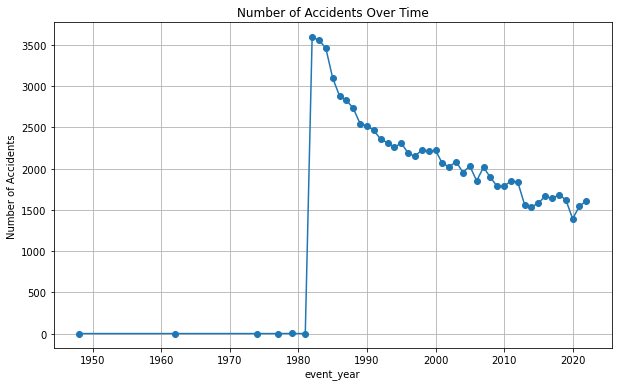

In [128]:
# Set the figure size
plt.figure(figsize=(10, 6))

plt.plot(accidents_by_year['event_year'], accidents_by_year['accident_count'], marker='o', linestyle='-')
plt.xlabel('event_year')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents Over Time')

# Add grid lines
plt.grid(True)
plt.show()

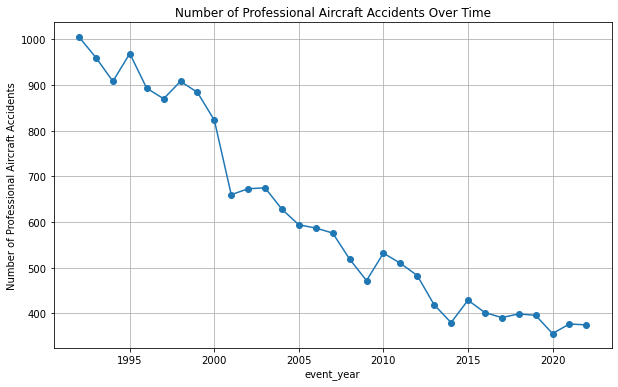

In [125]:
prof_by_year = filtered_df.groupby('event_year').size().reset_index(name='accident_count')

# Set the figure size
plt.figure(figsize=(10, 6))

plt.plot(prof_by_year['event_year'], prof_by_year['accident_count'], marker='o', linestyle='-')
plt.xlabel('event_year')
plt.ylabel('Number of Professional Aircraft Accidents')
plt.title('Number of Professional Aircraft Accidents Over Time')

# Add grid lines
plt.grid(True)
plt.show()

In [ ]:
accidents_by_make_fig, accidents_by_make_axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

accidents_by_make_axes[0].set_title('Makes with Most Accidents')
accidents_by_make_axes[0].set_ylabel('Number of Accidents')
accidents_by_make_axes[0].set_xlabel('Make')

accidents_by_make_axes[1].set_title('Most with Least Amount of Accidents')
accidents_by_make_axes[1].set_ylabel('injury_servity')
accidents_by_make_axes[1].set_xlabel('weather_condition')

accidents_by_make_low = filtered_df['weather'][filtered_df['investigation_type'].value_counts().tail()]
accidents_by_make_high = filtered_df['make'][filtered_df['investigation_type'].value_counts().head()]

accidents_by_make_axes[0].hist(accidents_by_make_low, bins=15)
accidents_by_make_axes[1].hist(accidents_by_make_high, bins=30)

plt.savefig(dpi=150)
plt.show()

In [ ]:
# Add another layer of filtering for our relevant columns

# Figure out what to do with null values

# Change unknown and null values to the same

In [ ]:
# Start plotting stuff

In [ ]:
aviation_df['event_date'].sort_values()

In [ ]:
# find number of entries for each year
aviation_df['Event.Year'].value_counts().sort_index()

In [ ]:
#create a dictionary for years and counts
year = list(df['Event.Year'].value_counts().sort_index().index)
count = list(df['Event.Year'].value_counts().sort_index().values)
year_dict = {year[i]: count[i] for i in range(len(year))}
year_dict

In [ ]:
#show which Event.Years are relevant years
y = 2013
df['Relevant.Year'] = np.where(df['Event.Year'] >= y, True, False)
df.head()

In [ ]:
list(df['Amateur.Built'].value_counts().sort_index())

In [ ]:
x1 = df['Event.Year'].value_counts().sort_index().index
y1 = df['Event.Year'].value_counts().sort_index().values

plt.plot(x1, y1)
plt.show()

In [ ]:
df['Number.of.Engines'].value_counts().sort_index()

In [ ]:
df['Engine.Type'].value_counts().sort_index()

In [ ]:
country = list(df['Country'].value_counts().sort_index().index)
count2 = list(df['Country'].value_counts().sort_index().values)
country_dict = {country[i]: count2[i] for i in range(len(country))}
country_dict